# Multiple Linear Regression

Similar to the Simple Linear Regression but with multiple variables 

<img src="img/formula.png" width="600" height="300">

__Assumptions of a Linear Regression:__
- Linearity
- Homoscedasticity
- Multivariate normality
- Independence of errors
- Lack of multicollinearity

More information [here](https://www.youtube.com/watch?v=but2n_zBPpU)

Before starting to build a Linear Regression model you need to check if these assumptions are true

First let's import our dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In our dataset, we see that every columns contain numerical values except State which is a __categorical data__

So we can't put this feature un our multiple linear regression equation.

So we need to create __dummy variables__.

<img src="img/dummy_variables.png" width="600" height="300">


So in our equation we will use the New York column instead of the State column (for California the value if 1 if a value in New York column is 0, so we don't need to use this column)

<img src="img/dummy_variables_2.png" width="600" height="300">

#### __Dummy Variable Trap__

If you are adding both Dummy (New York -> D1 & California -> D2) variables you will duplicate a variable (Because D2 = 1 - D1).  

The phenomenom when one or several independent variables in a linear regression predict another is called multicollinearity. 

Because of that the model can't distinguish the effect of D1 from the effect of D2 and therefor it is not going to work proprely that is called the __Dummy Variable Trap__ (So we can't have the constant and Dummy variables at the same time).

So one rule , __always omit one variable__ in the equation.

<img src="img/dummy_variables_3.png" width="600" height="300">


Before going further, you need to know what is a __p_value__ : P value is a statistical measure that helps scientists determine whether or not their hypotheses are correct

For detailed information, have a look [here](https://www.wikihow.com/Calculate-P-Value)

#### __Building a model__

Have a look to the [Step by step guide](https://www.superdatascience.com/wp-content/uploads/2017/02/Step-by-step-Blueprints-For-Building-Models.pdf)

## Example

Let's begin : We want to predict the profit __(Dependent variable vector Y )__ using our spend columns __(Independent variables matric X )__

First create the matrix and vector

In [2]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

X,y

(array([[165349.2, 136897.8, 471784.1, 'New York'],
        [162597.7, 151377.59, 443898.53, 'California'],
        [153441.51, 101145.55, 407934.54, 'Florida'],
        [144372.41, 118671.85, 383199.62, 'New York'],
        [142107.34, 91391.77, 366168.42, 'Florida'],
        [131876.9, 99814.71, 362861.36, 'New York'],
        [134615.46, 147198.87, 127716.82, 'California'],
        [130298.13, 145530.06, 323876.68, 'Florida'],
        [120542.52, 148718.95, 311613.29, 'New York'],
        [123334.88, 108679.17, 304981.62, 'California'],
        [101913.08, 110594.11, 229160.95, 'Florida'],
        [100671.96, 91790.61, 249744.55, 'California'],
        [93863.75, 127320.38, 249839.44, 'Florida'],
        [91992.39, 135495.07, 252664.93, 'California'],
        [119943.24, 156547.42, 256512.92, 'Florida'],
        [114523.61, 122616.84, 261776.23, 'New York'],
        [78013.11, 121597.55, 264346.06, 'California'],
        [94657.16, 145077.58, 282574.31, 'New York'],
        [91749.1

Then We have to encode categorical data (State).

__WARNING__: Don't forget to remove one Dummy variable column. For our column ou are going to remove de first column

In [3]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

# Avoiding the Dummy Variable Trap
X = X[:, 1:]


# Formatting numpy to only show integer and not float
np.set_printoptions(formatter={'float': '{: 0.0f}'.format})

X

array([[ 0,  1,  165349,  136898,  471784],
       [ 0,  0,  162598,  151378,  443899],
       [ 1,  0,  153442,  101146,  407935],
       [ 0,  1,  144372,  118672,  383200],
       [ 1,  0,  142107,  91392,  366168],
       [ 0,  1,  131877,  99815,  362861],
       [ 0,  0,  134615,  147199,  127717],
       [ 1,  0,  130298,  145530,  323877],
       [ 0,  1,  120543,  148719,  311613],
       [ 0,  0,  123335,  108679,  304982],
       [ 1,  0,  101913,  110594,  229161],
       [ 0,  0,  100672,  91791,  249745],
       [ 1,  0,  93864,  127320,  249839],
       [ 0,  0,  91992,  135495,  252665],
       [ 1,  0,  119943,  156547,  256513],
       [ 0,  1,  114524,  122617,  261776],
       [ 0,  0,  78013,  121598,  264346],
       [ 0,  1,  94657,  145078,  282574],
       [ 1,  0,  91749,  114176,  294920],
       [ 0,  1,  86420,  153514,  0],
       [ 0,  0,  76254,  113867,  298664],
       [ 0,  1,  78389,  153773,  299737],
       [ 1,  0,  73995,  122783,  303319],
     

Now we are able to split our data into Train and test sets

In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

c:\users\yanni iyeze\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


We are now able to fit our Multiple Linear Regression model to the training set and predict using the test set that will create the vector of predictions.

In [5]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

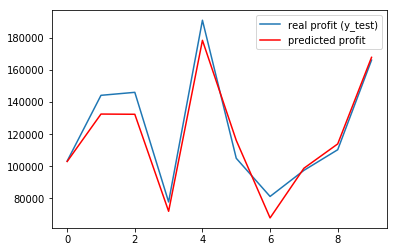

In [6]:
plt.plot(y_test, label = 'real profit (y_test)')
plt.plot(y_pred, color='red', label='predicted profit')
plt.legend()
plt.show()

## Example Backward Elimination 

To have better results by removing non-statistical variables.

We are going to use the statsmodels library
- 1: Choosing an "acceptable" value for p-value
- 2: Create an optimal matrix with the features you want use
- 3: Use the regressor to calculate p-values for your optimal matrix

If you have a feature with a p-value greater than you acceptable value remove its index from you opt matrix (2:) and start again 

__WARNING__ : Be careful with the index of features when you are removing features.

You are done when your regressor have features with p-values lower than the acceptance value.

In [7]:
# Building the optimal model using Backward Elimination
import statsmodels.formula.api as sm

# Step 1 - SL = 0.05 - Invert np.ones and X to have it at the beginning
X = np.append(arr = np.ones((50,1)).astype(int), values= X, axis=1)

# Step 2 - Choosing features

# Optimal Matrix of features
X_opt = X[:, [0, 1, 2, 3, 4, 5]]

regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()

# Step 3
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 14 May 2018   Prob (F-statistic):           1.34e-27
Time:                        22:12:47   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
#Removing index with big p-value -> 2
#Optimal Matrix of features
X_opt_2 = X[:, [0, 1, 3, 4, 5]]

regressor_OLS = sm.OLS(endog=y, exog=X_opt_2).fit()

regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 14 May 2018   Prob (F-statistic):           8.49e-29
Time:                        22:12:47   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
#Removing index with big p-value -> 1
#Optimal Matrix of features
X_opt_3 = X[:, [0, 3, 4, 5]]

regressor_OLS = sm.OLS(endog=y, exog=X_opt_3).fit()

regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 14 May 2018   Prob (F-statistic):           4.53e-30
Time:                        22:12:47   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
#Removing index with big p-value -> 4
#Optimal Matrix of features
X_opt_4 = X[:, [0, 3, 5]]

regressor_OLS = sm.OLS(endog=y, exog=X_opt_4).fit()

regressor_OLS.summary()

#Removing index with big p-value
#Optimal Matrix of features
X_opt_5 = X[:, [0, 3]]

regressor_OLS = sm.OLS(endog=y, exog=X_opt_5).fit()

regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 14 May 2018   Prob (F-statistic):           3.50e-32
Time:                        22:12:47   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Automatic Backward Elimination
### Backward Elimination with p-values only

In [11]:
import statsmodels.formula.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x

SL = 0.05
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
X_Modeled = backwardElimination(X_opt, SL)

### Backward Elimination with p-values and Adjusted R Squared

In [12]:

import statsmodels.formula.api as sm
def backwardElimination(x, SL):
    numVars = len(x[0])
    temp = np.zeros((50,6)).astype(int)
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        adjR_before = regressor_OLS.rsquared_adj.astype(float)
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    temp[:,j] = x[:, j]
                    x = np.delete(x, j, 1)
                    tmp_regressor = sm.OLS(y, x).fit()
                    adjR_after = tmp_regressor.rsquared_adj.astype(float)
                    if (adjR_before >= adjR_after):
                        x_rollback = np.hstack((x, temp[:,[0,j]]))
                        x_rollback = np.delete(x_rollback, j, 1)
                        print (regressor_OLS.summary())
                        return x_rollback
                    else:
                        continue
    regressor_OLS.summary()
    return x

SL = 0.05
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
X_Modeled = backwardElimination(X_opt, SL)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Mon, 14 May 2018   Prob (F-statistic):           2.16e-31
Time:                        22:12:47   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.0

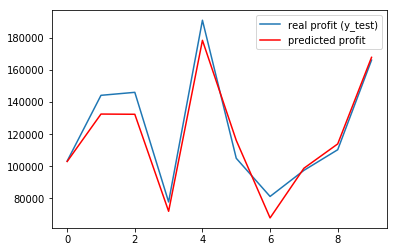

In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_opt, y, test_size = 0.2, random_state = 0)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

plt.plot(y_test, label = 'real profit (y_test)')
plt.plot(y_pred, color='red', label='predicted profit')
plt.legend()
plt.show()